In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import folium

import json
from pathlib import Path
import pymap3d
from datetime import datetime

import pandas as pd

In [2]:
import os
os.environ["PYTHONPATH"]

'D:/projects/PTETA'

In [3]:
# f_path = Path('../data/routes/chernivtsi/eway/trolbus/trolbus_11.json')
route_path = Path('../data/routes/chernivtsi/eway/bus/bus_11.json')


with open(str(route_path), 'r') as f:
    route_data = json.load(f)

route_data.keys()

dict_keys(['general', 'stops', 'scheme', 'begin', 'end', 'intervals'])

In [5]:
m = folium.Map(
    location=np.mean([[p['x'], p['y']]for p in route_data['stops']['forward']], axis=0), 
    zoom_start=12, height='90%', width='55%'
    )

for coord in route_data['stops']['forward']:
    folium.Circle(
        location=[ coord['x'], coord['y'] ], fill_color='#43d9de', 
        radius=16, popup=f"{coord['i']}) {coord['n']}"
    ).add_to( m )
    
folium.PolyLine(
    locations=[[float(l) for l in p.split(',')] 
               for p in route_data['scheme']['forward'].split(' ')], 
    color='#43d9de'
    ).add_to( m )
    
# for coord in route_data['stops']['backward']:
#     folium.Circle(location=[ coord['x'], coord['y'] ], 
#                   fill_color='green', 
#                   radius=8,
#                  popup=f"{coord['i']}) {coord['n']}"
#                  ).add_to( m )
# folium.PolyLine(
#     locations=[[float(l) for l in p.split(',')] 
#                for p in route_data['scheme']['backward'].split(' ')], 
#     color='green'
#     ).add_to( m )

m

In [6]:
forward_route = [[float(l) for l in p.split(',')] 
                 for p in route_data['scheme']['forward'].split(' ')]
forward_route_np = np.array(forward_route)

CHERNIVTSI_CENTER = np.array([48.3, 25.933333])
CHERNIVTSI_CENTER, forward_route_np.shape

(array([48.3     , 25.933333]), (256, 2))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
%load_ext autoreload
%autoreload 2

from PTETA.utils.TrackENU import TrackENU        
        
track_11f = TrackENU(forward_route_np, CHERNIVTSI_CENTER)
len(track_11f), track_11f.track_enu.shape, track_11f.track_geod.shape, forward_route_np.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(167, (167, 2), (167, 2), (256, 2))

In [24]:
mx_dist = 50

m = folium.Map(
    location=np.mean([[p['x'], p['y']]for p in route_data['stops']['forward']], axis=0), 
    zoom_start=12, height='90%', width='55%'
    )

opt_route = track_11f.track_geod

print(f"{opt_route.shape} - {track_11f.track_enu.shape}")
    
for coord in opt_route:
    folium.Circle(location=[ coord[0], coord[1] ], 
                  color='blue', 
                  radius=4,
                 ).add_to( m )
    folium.Circle(location=[ coord[0], coord[1] ], 
                  color='green', 
                  radius=mx_dist,
                 ).add_to( m )
    
for coord in forward_route_np:
    folium.Circle(location=[ coord[0], coord[1] ], 
                  color='red', 
                  radius=1,
                 ).add_to( m )
# folium.PolyLine(
#     locations=r.convert_to_geod(opt_route), 
# #     locations=opt_route,
#     color='red'
# #     ).add_to( m )

folium.PolyLine(
    locations=track_11f.track_geod, axis=0,
    color='green'
    ).add_to( m )

# {'proj_vec': array([39.40816411, 11.59206913]), 
#  'proj_length': 41.07772467940181, 
#  'tang_vec': array([  541.09231224, -1839.48649707]), 
#  'distance_to_line': 1917.417915656256, 
#  'proj_point': array([-413.97598403, 1888.60396833])}

for seg_n, _ in enumerate(track_11f.unit_vec):
    res = track_11f.get_proj_on_seg_data(seg_n, CHERNIVTSI_CENTER - 5e-4)
    if res is not None:
#         print(f"{seg_n:03}) {res}")
        folium.PolyLine(
            locations=track_11f.convert_to_geod(np.vstack([res['proj_point'], CHERNIVTSI_CENTER])), 
            color='orange'
        ).add_to(m)

m

(167, 2) - (167, 2)


In [25]:
track_11f.get_proj_on_track(CHERNIVTSI_CENTER)

{'segment_projection': None,
 'optimal_point_dist': {'point_number': 0,
  'dist_to_point': 859.6923694795338,
  'progress': 0.0},
 'track_bounds_dist': {'start': 859.6923694795338, 'end': 5581.278795079648}}

In [26]:
vlc_data_path = Path("../data/local/tables/data_for_17_OCT_2022.csv")
df = pd.read_csv(vlc_data_path)

In [11]:
# li = []

# for filename in [p for p in Path("../data/local/tables").iterdir()][-10:]:
#     df = pd.read_csv(filename)
#     li.append(df)

# frame = pd.concat(li, axis=0, ignore_index=True)

In [13]:
# df[df['routeName'] == '20'][['id', 'imei', 'name', 'routeName']].value_counts()

In [27]:
df[(df['routeName'] == "11")| (df['routeName'] == "11/3") ][['imei', 'routeName']].value_counts()

imei             routeName
355227046453528  11           3928
355227046451027  11           3574
355227045540572  11           2800
355227045541208  11            810
355227046451332  11              1
dtype: int64

In [28]:
df[df['imei'] == 355227046453528]

,id,imei,name,stateCode,stateName,lat,lng,speed,orientation,gpstime,routeId,routeName,routeColour,inDepo,busNumber,perevId,perevName,remark,online,idBusTypes
3782,326,355227046453528,H8,used,used,48.322998,25.933548,0.0,0.00,2022-10-17 05:08:58,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
4466,326,355227046453528,H8,used,used,48.323095,25.933523,0.0,0.00,2022-10-17 05:13:09,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
4526,326,355227046453528,H8,used,used,48.323100,25.933523,0.0,0.00,2022-10-17 05:13:29,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
4555,326,355227046453528,H8,used,used,48.323110,25.933523,0.0,0.00,2022-10-17 05:13:39,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
4584,326,355227046453528,H8,used,used,48.323115,25.933525,0.0,0.00,2022-10-17 05:13:49,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254640,326,355227046453528,H8,used,used,48.324377,25.933650,7.0,19.34,2022-10-17 20:13:05,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
254655,326,355227046453528,H8,used,used,48.324395,25.933728,0.0,108.54,2022-10-17 20:13:11,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
254680,326,355227046453528,H8,used,used,48.324363,25.933623,2.4,108.54,2022-10-17 20:13:22,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0
254710,326,355227046453528,H8,used,used,48.324360,25.933598,0.0,108.54,2022-10-17 20:13:32,2,11,green,True,0047,1.0,Денисівка,0047 DNSNTNK,True,1.0


In [29]:
def rgb_to_hex(r, g, b):
    return f'{r:02x}{g:02x}{b:02x}'


def plot_coloured_route(route, folium_map, color_map=mpl.cm.get_cmap('jet'), bins=10):
    bins = min(bins, len(route))
    
    lspace = np.linspace(0, len(route), num=bins+1, dtype=int)
    
    for i, (lb, rb) in enumerate(zip(lspace[:-1], lspace[1:]) ):
        clr = rgb_to_hex(*tuple(map(lambda x : int(x*255), color_map(i/bins) ))[:3])
        folium.PolyLine(
            route[lb:rb+1, :],
            color=f"#{clr}", weight=2,
            opacity=0.8
        ).add_to(folium_map)

In [ ]:
355227046453528  11           3928
355227046451027  11           3574
355227045540572  11           2800
355227045541208  11            810
355227046451332  11              1

In [30]:
# updata_tm = [datetime.strptime(dt, '%Y-%m-%d %H:%M:%S').timestamp() for dt in sum_df['gpstime'].unique() ]
# updata_tm_np = np.array(updata_tm)

gps_data = df[df['imei'] == 355227045600178][['lat', 'lng', 'gpstime']].values
gps_data[:, 2] = [datetime.strptime(dt, '%Y-%m-%d %H:%M:%S').timestamp() for dt in gps_data[:, 2] ]
gps_data = gps_data.astype(float)

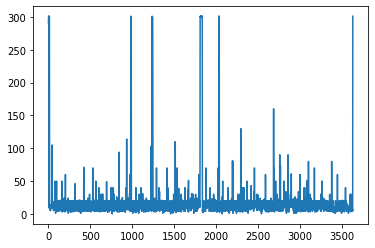

In [31]:
plt.plot(np.diff(gps_data[:, 2]))

In [32]:
np.diff(gps_data[:, 2])[np.diff(gps_data[:, 2]) <= 0 ]

array([0., 0., 0., 0.])

In [34]:
trace = gps_data[:, :2]

m = folium.Map(
    location=np.mean(trace, axis=0), 
    zoom_start=12, height='50%', width='55%'
    )

plot_coloured_route(trace, m)

m

In [35]:
import time
from tqdm import tqdm

In [46]:
%load_ext autoreload
%autoreload 2

from PTETA.utils.TrackENU import TrackENU        
        
track_11f = TrackENU(forward_route_np, CHERNIVTSI_CENTER)
len(track_11f), track_11f.track_enu.shape, track_11f.track_geod.shape, forward_route_np.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(167, (167, 2), (167, 2), (256, 2))

In [47]:
# r.convert_to_enu(gps_data[:, :2])
track_11f.convert_to_enu(gps_data [0, :2])

array([[ 4302.63406435, -3748.82497236]])

In [48]:
gps_data [0, :2]

array([48.26627167, 25.99128833])

In [51]:
dists = [None] * len(gps_data)

st = time.perf_counter()

for i, coord in tqdm(enumerate(gps_data[:, :2])):
    dists[i] = track_11f.get_proj_on_track(track_11f.convert_to_enu(coord))

end = time.perf_counter()
print(f"{end - st}")

3635it [00:03, 974.63it/s] 

3.731153499999891


In [74]:
from PTETA.utils.RouteENU import RouteENU
route11 = RouteENU(route_data, CHERNIVTSI_CENTER)

In [75]:
route11.get_projection_on_track(gps_data[:, :2])

RouteProjection(forward=array([[2891.9538623 ,    0.        ],
       [2891.9538623 ,    0.        ],
       [2891.9538623 ,    0.        ],
       ...,
       [2891.73609453,    0.        ],
       [2895.43954113,    0.        ],
       [2895.43954113,    0.        ]]), backward=array([[2891.9538623 ,    0.        ],
       [2891.9538623 ,    0.        ],
       [2891.9538623 ,    0.        ],
       ...,
       [2891.73609453,    0.        ],
       [2895.43954113,    0.        ],
       [2895.43954113,    0.        ]]))

In [57]:
# dists[1222]

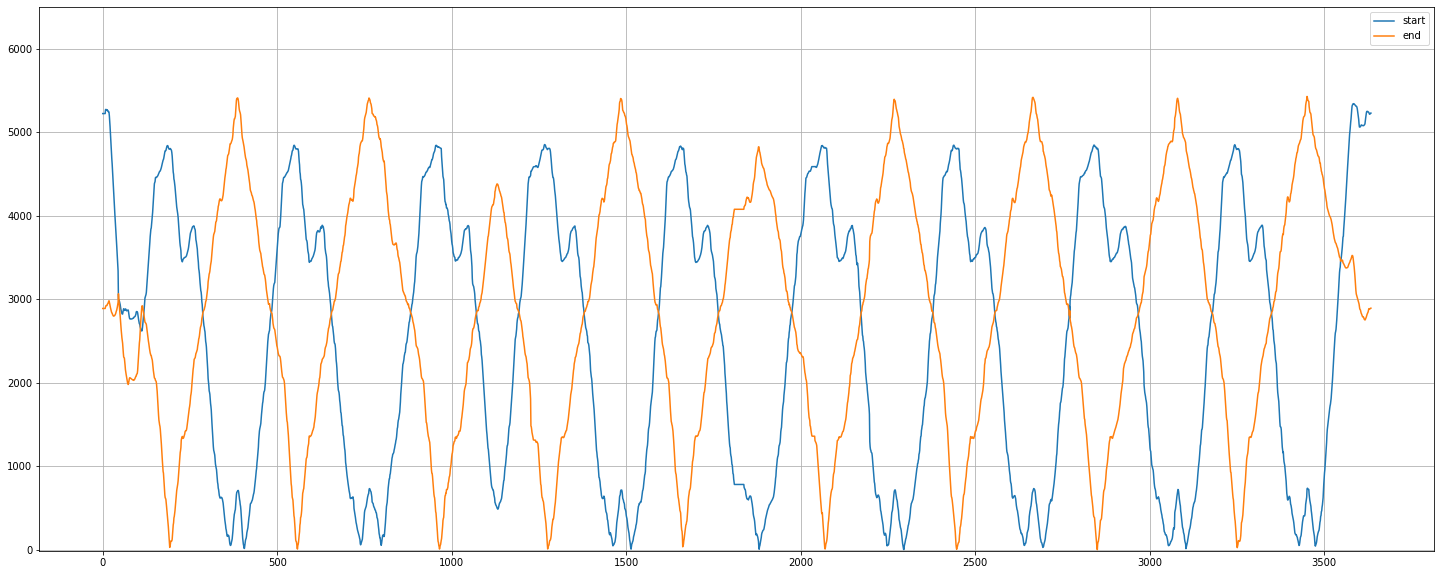

In [54]:
plt.figure(figsize=(25, 10))
plt.plot([r['track_bounds_dist']['start'] for r in dists], label='start')
plt.plot([r['track_bounds_dist']['end'] for r in dists], label='end')
plt.ylim(-10, 6500)
plt.legend()
plt.grid()

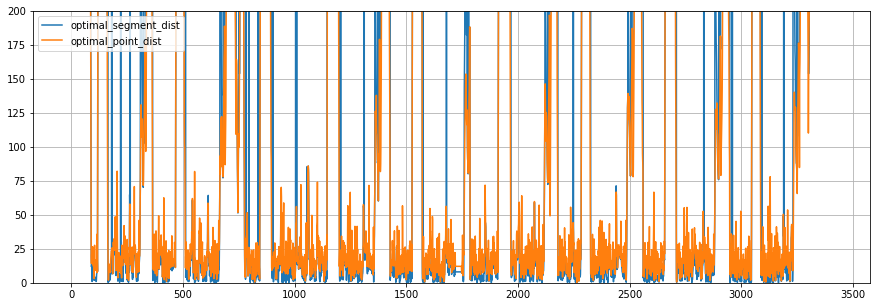

In [55]:
plt.figure(figsize=(15, 5))
lb, rb = 0, -1
plt.plot([r['segment_projection']['distance_to_line'] 
          for r in dists[lb:rb] if r['segment_projection'] is not None], 
        label = "optimal_segment_dist")
plt.plot([r['optimal_point_dist']['dist_to_point'] 
          for r in dists[lb:rb] if r['segment_projection'] is not None], 
        label = "optimal_point_dist")
plt.ylim(0, 200)

plt.grid()
plt.legend()

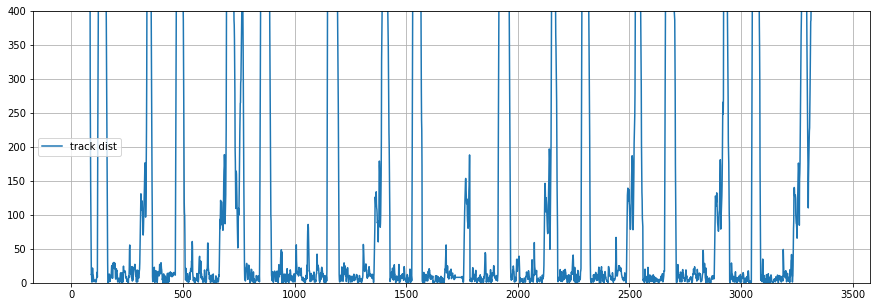

In [56]:
plt.figure(figsize=(15, 5))
lb, rb = 0, -1
plt.plot([min(r['segment_projection']['distance_to_line'], 
              r['optimal_point_dist']['dist_to_point']  )
          for r in dists[lb:rb] if r['segment_projection'] is not None], 
        label = "track dist")
# plt.plot([r['optimal_point_dist']['dist_to_point'] 
#           for r in dists[lb:rb] if r['segment_projection'] is not None], 
#         label = "optimal_point_dist")
plt.ylim(0, 400)

plt.grid()
plt.legend()